## Data Overview

Dimulai dengan meng-import dataset sebagai DataFrame dengan Pandas, serta melihat 5 baris pertama dengan head() method.
Lalu, melakukan pembersihan kolom yang tidak relevan dengan tujuan proyek.

In [8]:
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # Menambahkan GridSearchCV/RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE


# Statistical Libraries
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# --- 1. Memuat Data (Loading Data) ---
# Memuat dataset Churn_Modelling.csv
# Pastikan file 'Churn_Modelling.csv' berada di direktori yang sama dengan notebook ini,
# atau sediakan path lengkap ke file tersebut.
try:
    df = pd.read_csv('Churn_Modelling.csv')
    print("Dataset berhasil dimuat!")
    print(df.head())
except FileNotFoundError:
    print("Error: File 'Churn_Modelling.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    # Exit atau tangani error lebih lanjut jika file tidak ada
    exit()

# Menampilkan informasi dasar dataset
print("\n--- Informasi Dataset ---")
df.info()

# Menampilkan statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(df.describe().T) # Menggunakan .T agar lebih mudah dibaca

Dataset berhasil dimuat!
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

In [10]:
# --- 2. Pembersihan dan Persiapan Data Awal (Initial Data Cleaning and Preparation) ---

# Menghapus kolom yang tidak relevan untuk prediksi churn
# 'RowNumber', 'CustomerId', 'Surname' biasanya tidak memberikan informasi prediktif
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print("\nKolom 'RowNumber', 'CustomerId', 'Surname' berhasil dihapus.")

# Mengidentifikasi missing values
print("\n--- Melakukan pengecekan terhadap missing values ---")
print(df.isnull().sum())
# Untuk dataset ini, sepertinya tidak ada missing values, tapi langkah ini penting



Kolom 'RowNumber', 'CustomerId', 'Surname' berhasil dihapus.

--- Melakukan pengecekan terhadap missing values ---
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64



--- Distribusi Variabel Target (Exited) ---
Exited
0    6370
1    1630
Name: count, dtype: int64
Exited
0    79.625
1    20.375
Name: proportion, dtype: float64


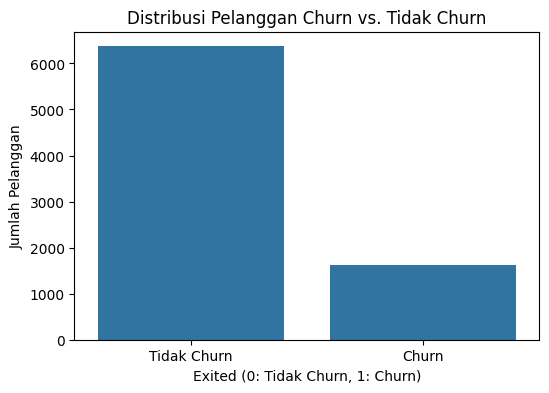

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Exited'])

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Analisis distribusi variabel target (Exited)
print("\n--- Distribusi Variabel Target (Exited) ---")
print(train_df['Exited'].value_counts())
print(train_df['Exited'].value_counts(normalize=True) * 100) # Persentase churn

# Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=train_df)
plt.title('Distribusi Pelanggan Churn vs. Tidak Churn')
plt.xlabel('Exited (0: Tidak Churn, 1: Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.show()

## Exploratory Data Analysis

In [12]:
# --- 3. Identifikasi Variabel Kategorikal dan Numerik ---
# Variabel kategorikal
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'] 
# Variabel numerik (kontinu)
numerical_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

print(f"\nVariabel Kategorikal: {list(categorical_features)}")
print(f"Variabel Numerik : {list(numerical_features)}")


Variabel Kategorikal: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Variabel Numerik : ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']


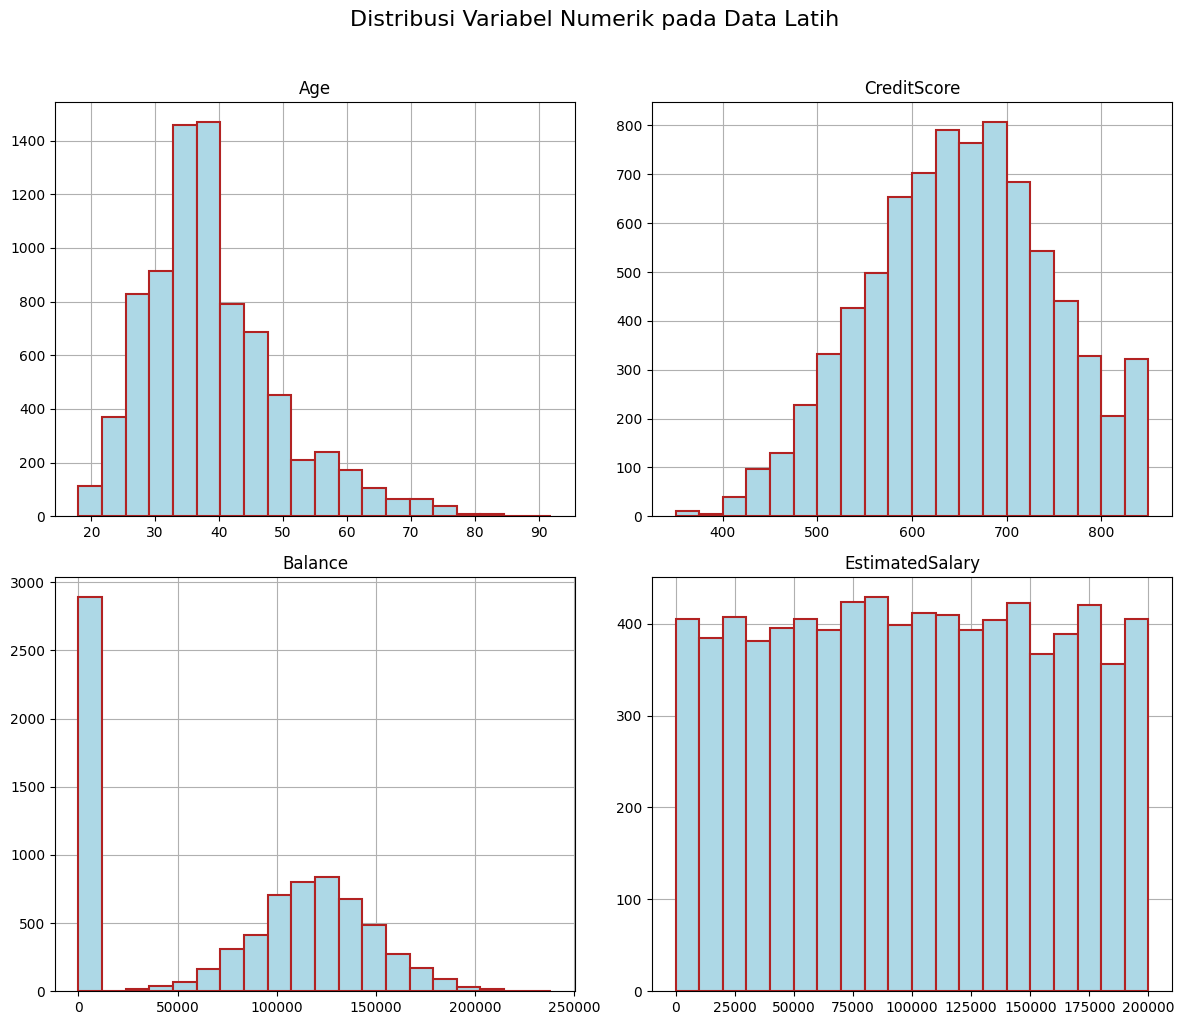

In [22]:
fig = train_df[numerical_features].hist(figsize=(12, 10), bins=20, layout=(2, 2), edgecolor='firebrick', color='lightblue', linewidth=1.5)

for ax_row in fig:
    for ax in ax_row:
        ax.set_axisbelow(True)

plt.suptitle('Distribusi Variabel Numerik pada Data Latih', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

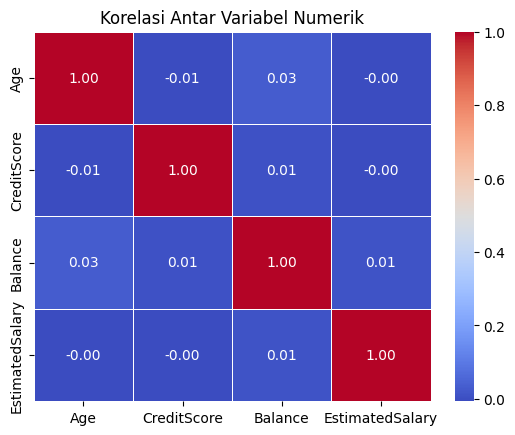

In [24]:
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


--- Membuat Visualisasi untuk Variabel Numerik (Histogram & Boxplot) ---


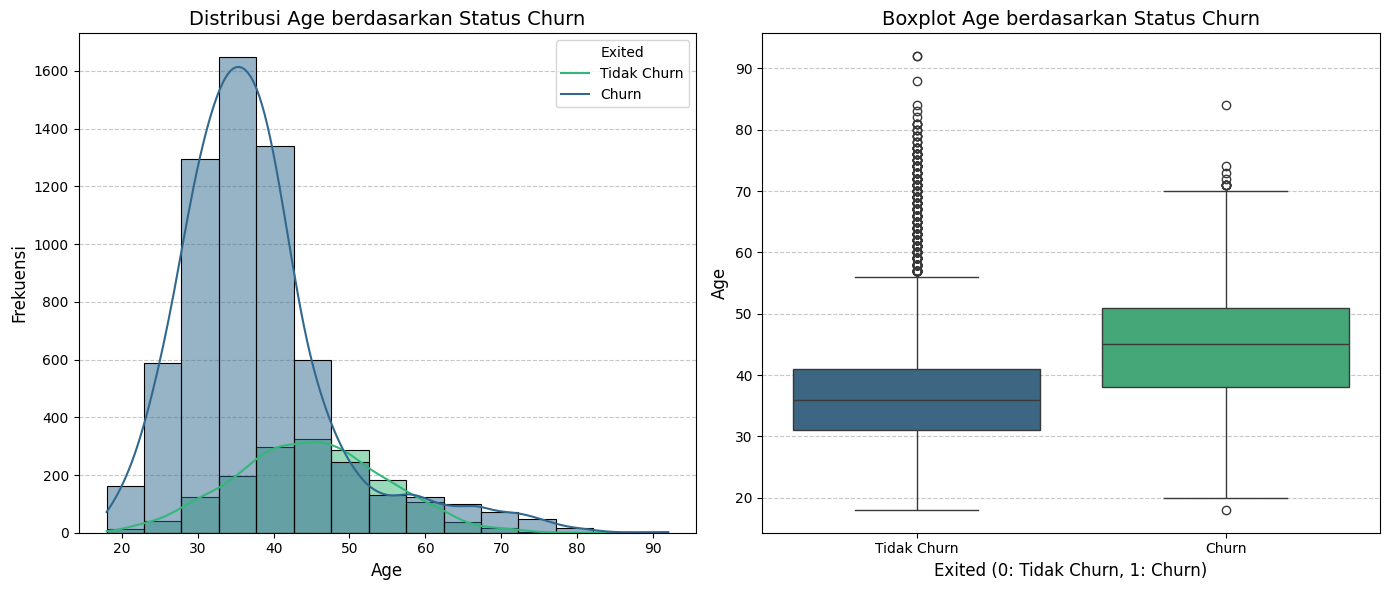

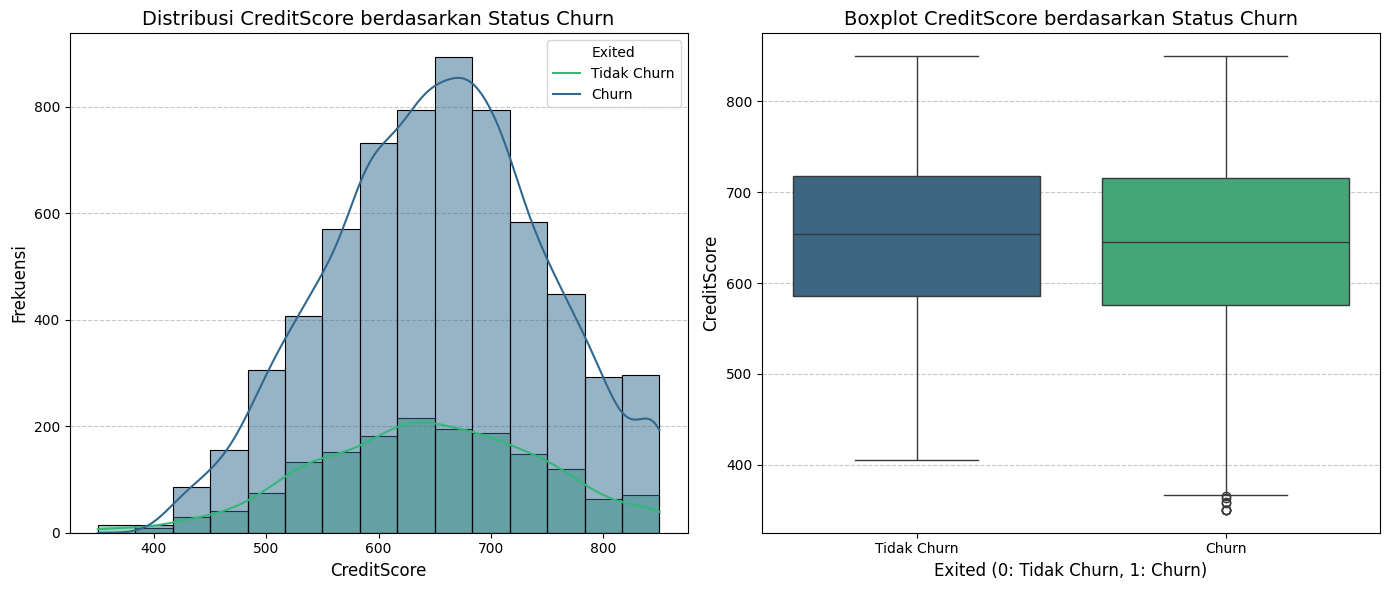

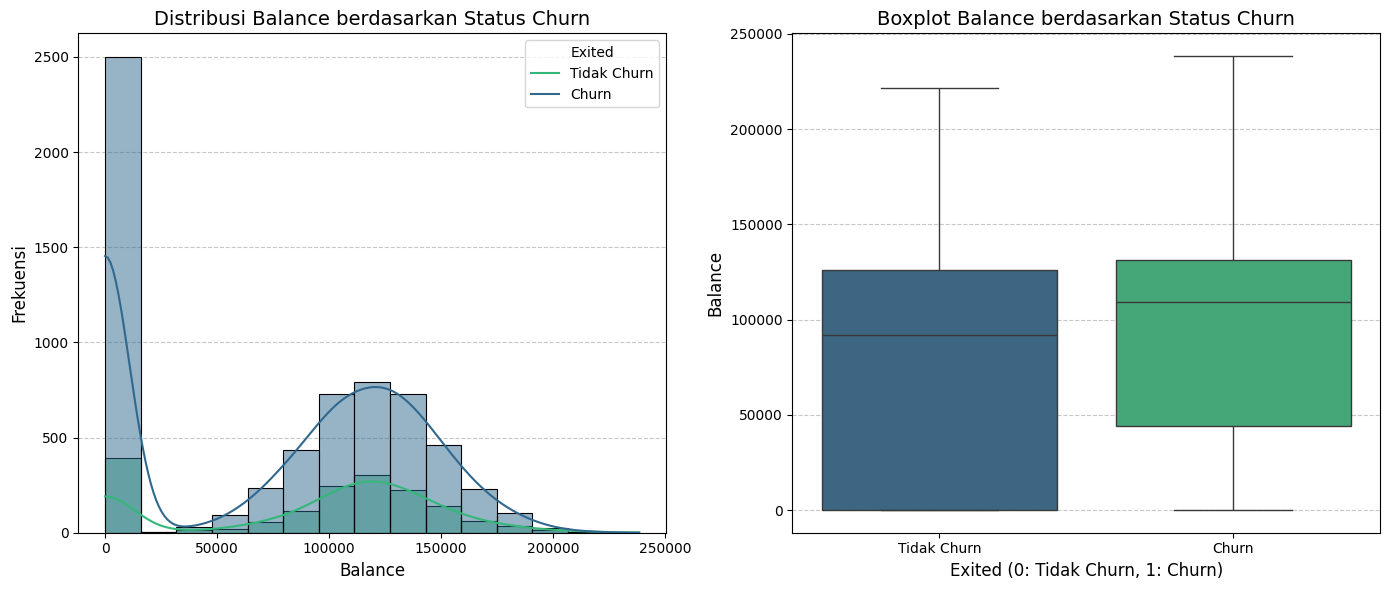

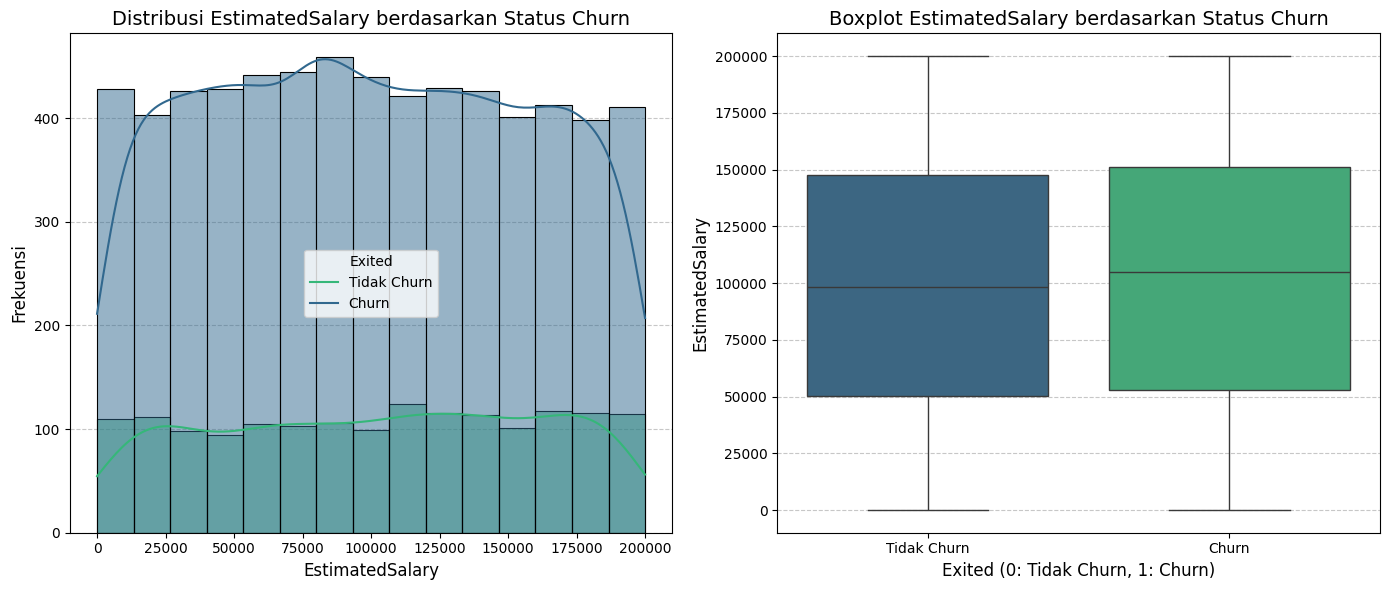

In [ ]:
# --- Visualisasi untuk Variabel Numerik ---
print("\n--- Membuat Visualisasi untuk Variabel Numerik (Histogram & Boxplot) ---")
for feature in numerical_features:
    plt.figure(figsize=(14, 6))

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=feature, hue='Exited', kde=True, palette='viridis',
                 edgecolor='black', linewidth=0.8, bins=15)
    plt.title(f'Distribusi {feature} berdasarkan Status Churn', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.legend(title='Exited', labels=['Tidak Churn', 'Churn']) # Custom label legend
    plt.grid(True, linestyle='--', alpha=0.7, axis='y') # Tambahkan grid pada sumbu y
    plt.gca().set_axisbelow(True) # Pastikan grid di belakang batang histogram

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exited', y=feature, data=train_df, palette='viridis')
    plt.title(f'Boxplot {feature} berdasarkan Status Churn', fontsize=14)
    plt.xlabel('Exited (0: Tidak Churn, 1: Churn)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
    plt.grid(True, linestyle='--', alpha=0.7, axis='y') # Tambahkan grid pada sumbu y
    plt.gca().set_axisbelow(True) # Pastikan grid di belakang boxplot

    plt.tight_layout()
    plt.show()



--- Membuat Visualisasi untuk Variabel Kategorikal (Countplot & Barplot) ---


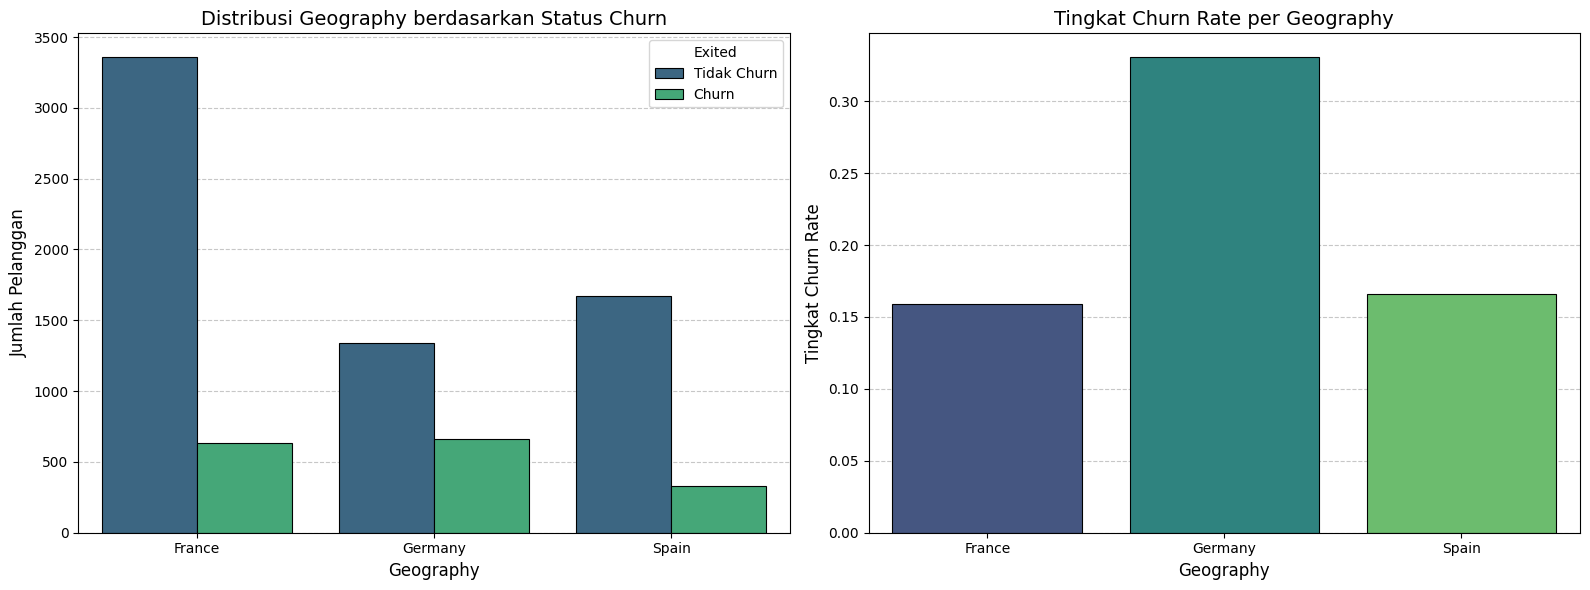

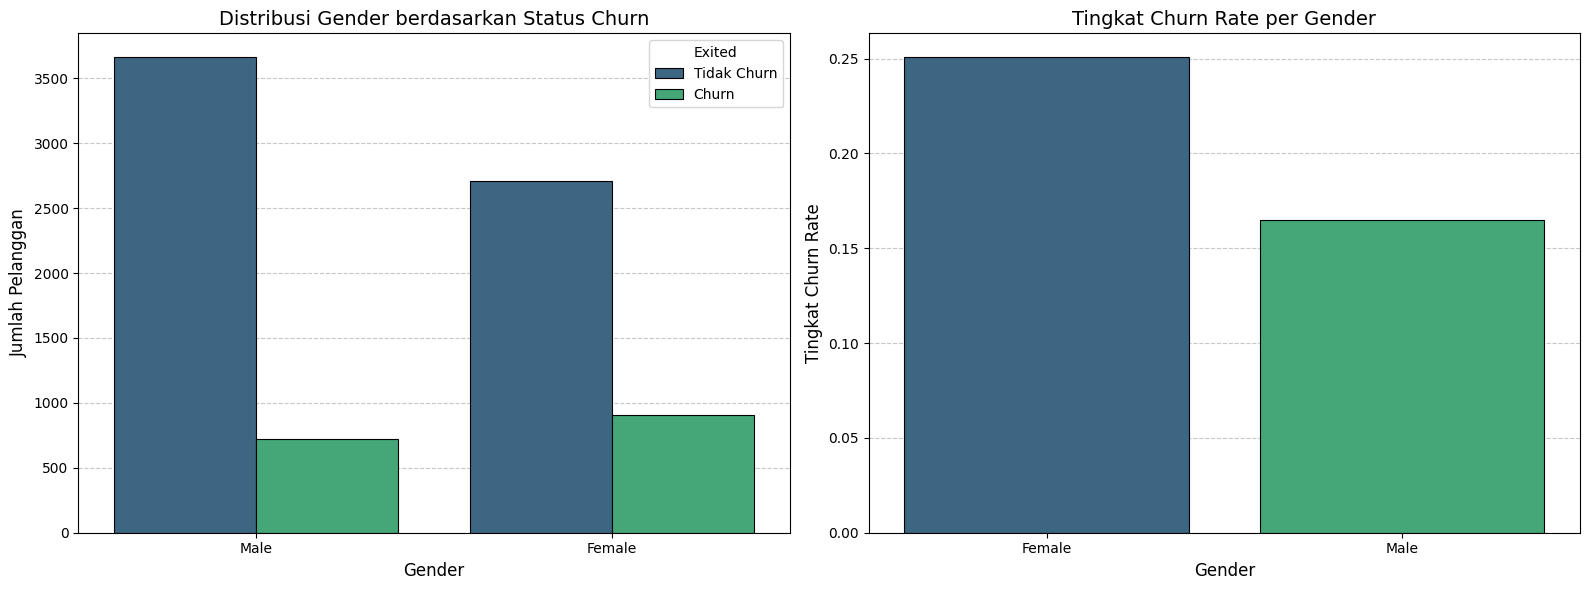

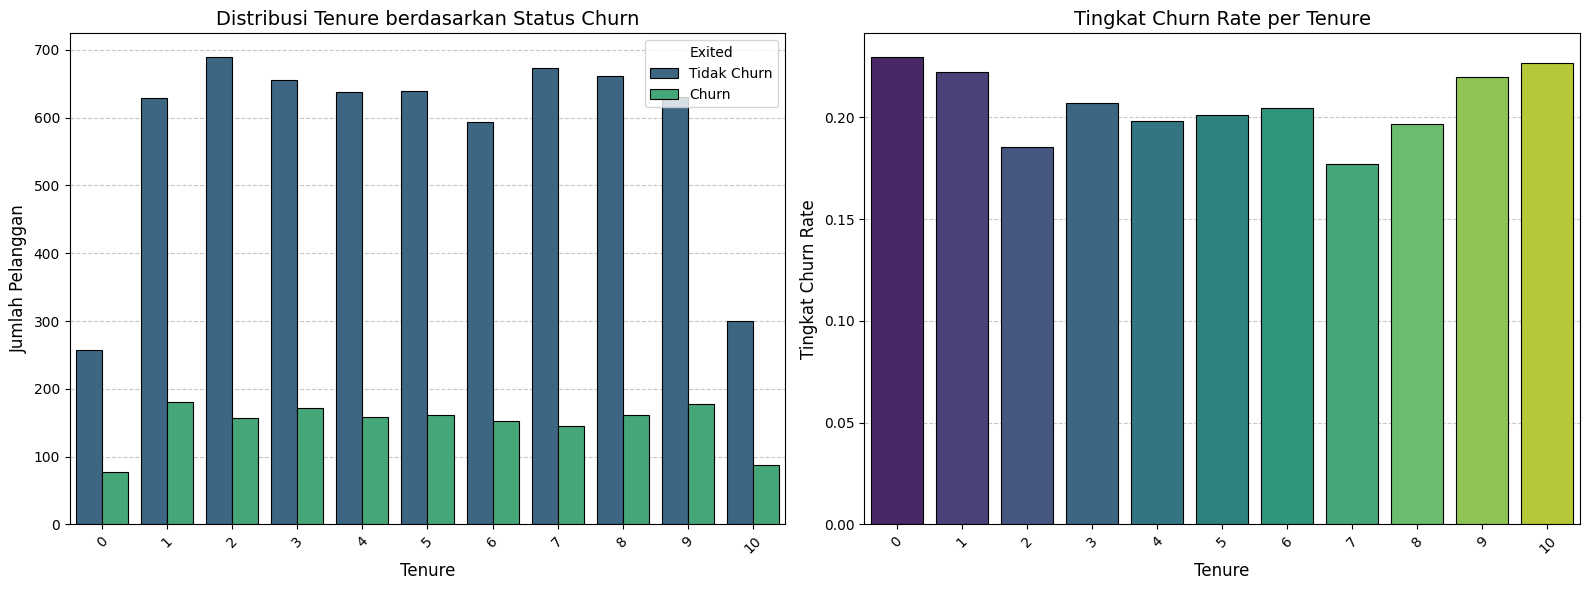

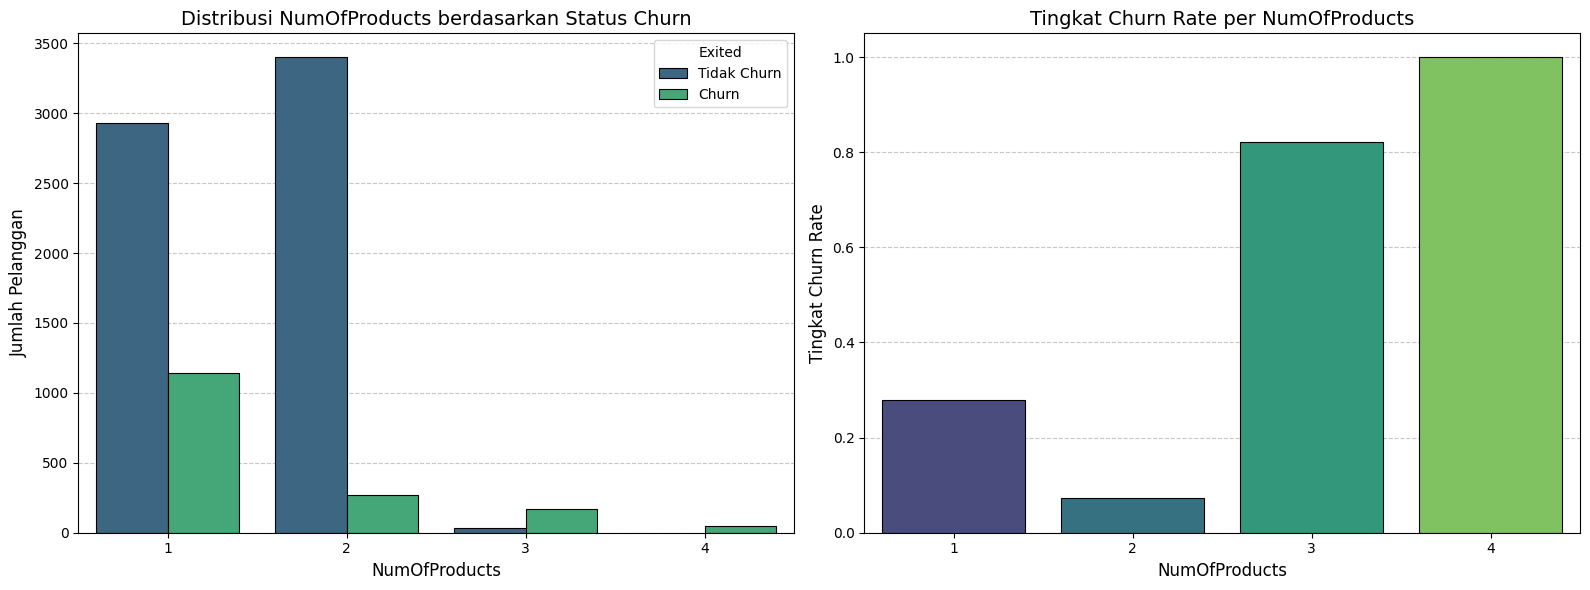

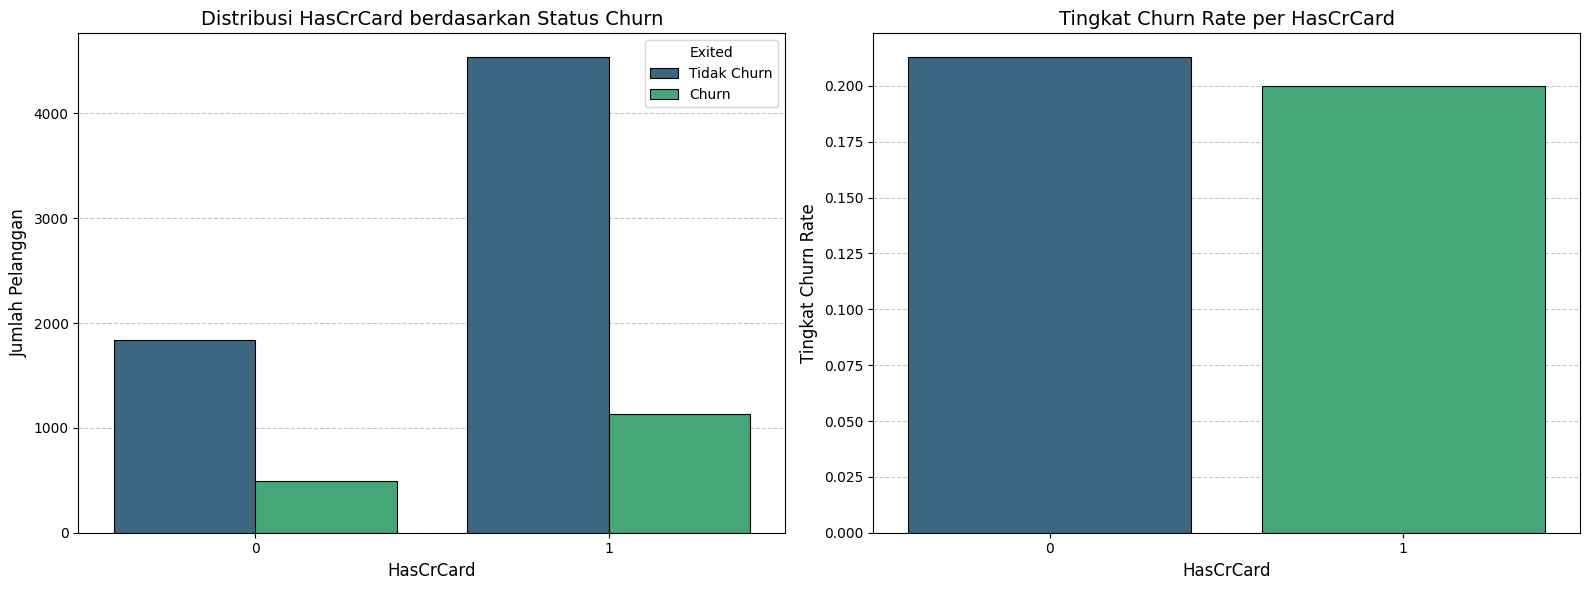

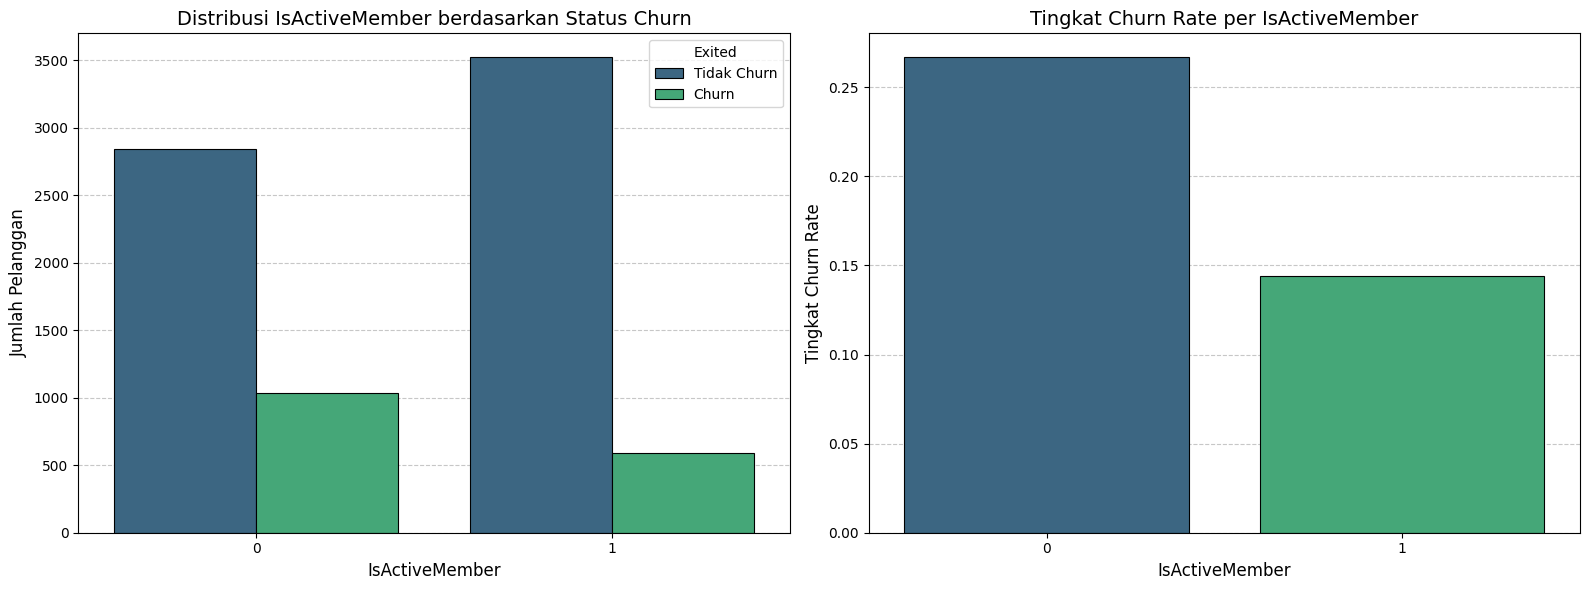

In [35]:
# --- Visualisasi untuk Variabel Kategorikal (Countplot & Barplot) ---
print("\n--- Membuat Visualisasi untuk Variabel Kategorikal (Countplot & Barplot) ---")
for feature in categorical_features:
    # Buat 2 subplot berdampingan
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: Countplot berdasarkan Status Churn (dengan hue)
    sns.countplot(x=feature, hue='Exited', data=train_df, palette='viridis',
                  edgecolor='black', linewidth=0.8, ax=ax1)
    ax1.set_title(f'Distribusi {feature} berdasarkan Status Churn', fontsize=14)
    ax1.set_xlabel(feature, fontsize=12)
    ax1.set_ylabel('Jumlah Pelanggan', fontsize=12)
    # Custom label legend untuk "Tidak Churn" dan "Churn"
    ax1.legend(title='Exited', labels=['Tidak Churn', 'Churn'])
    # Tambahkan grid pada sumbu y
    ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
    # Pastikan grid di belakang batang countplot
    ax1.set_axisbelow(True)

    # Rotasi label jika terlalu panjang untuk subplot 1
    if len(train_df[feature].unique()) > 5:
        ax1.tick_params(axis='x', rotation=45)

    # Subplot 2: Barplot Tingkat Churn Rate
    # Hitung churn rate untuk setiap kategori
    churn_rate = train_df.groupby(feature)['Exited'].mean().reset_index()
    sns.barplot(x=feature, y='Exited', data=churn_rate, palette='viridis',
                edgecolor='black', linewidth=0.8, ax=ax2)
    ax2.set_title(f'Tingkat Churn Rate per {feature}', fontsize=14)
    ax2.set_xlabel(feature, fontsize=12)
    ax2.set_ylabel('Tingkat Churn Rate', fontsize=12) # Label y diubah
    # Tambahkan grid pada sumbu y
    ax2.grid(True, linestyle='--', alpha=0.7, axis='y')
    # Pastikan grid di belakang batang barplot
    ax2.set_axisbelow(True)

    # Rotasi label jika terlalu panjang untuk subplot 2
    if len(train_df[feature].unique()) > 5:
        ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

## Feature Selection

Feature-feature yang tidak berdamapk terhadap kolom 'Exited' sebetulnya bisa kita lihat dari visualisasi sebelumnya.
Feature 'Tenure' dan 'HasCrCard' terdistribusi secara merata sehingga tidak ada kecenderungan yang berarti. Selain itu,
hal ini juga berlaku pada feature 'EstimatedSalary'.

In [37]:
# -- 4. Uji Chi-Square untuk Variabel Kategorikal --
print("\n--- Uji Chi-Square untuk Variabel Kategorikal ---")
chi2_array, p_array = [], []
for feature in categorical_features:
    crosstab = pd.crosstab(train_df[feature], train_df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi2 = pd.DataFrame({
    'Variable': categorical_features,
    'Chi-Square': chi2_array,
    'p-value': p_array
})
print("\n--- Hasil Uji Chi-Square ---")
print(df_chi2.sort_values(by='Chi-Square', ascending=False))


--- Uji Chi-Square untuk Variabel Kategorikal ---

--- Hasil Uji Chi-Square ---
         Variable   Chi-Square        p-value
3   NumOfProducts  1209.196262  7.411655e-262
0       Geography   266.055862   1.685402e-58
5  IsActiveMember   184.773456   4.397994e-42
1          Gender    89.224504   3.524562e-21
2          Tenure    11.602543   3.125368e-01
4       HasCrCard     1.609027   2.046287e-01


Chi-Square untuk feature 'HasCrCard' dan 'Tenure' sangat besar (>0,05), yang artinya tidak ada hubungan yang signifikan secara statistik.

In [38]:
features_to_drop = ['Tenure', 'HasCrCard', 'EstimatedSalary']
print("\n--- Menghapus Variabel Kategorikal yang Tidak Signifikan ---")
train_df.drop(features_to_drop, axis=1, inplace=True)
test_df.drop(features_to_drop, axis=1, inplace=True)
print(f"Variabel {features_to_drop} telah dihapus dari dataset.")


--- Menghapus Variabel Kategorikal yang Tidak Signifikan ---
Variabel ['Tenure', 'HasCrCard', 'EstimatedSalary'] telah dihapus dari dataset.


## Encoding Categorical Features



In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Gender'] = le.fit_transform(train_df['Gender'])
test_df['Gender'] = le.transform(test_df['Gender'])

geo_map = {'France': 0, 'Spain': 0, 'Germany': 1}
train_df['Geography'] = train_df['Geography'].map(geo_map)
test_df['Geography'] = test_df['Geography'].map(geo_map)



In [41]:
scaler = StandardScaler()
scl_features = ['Age', 'CreditScore', 'Balance']
train_df[scl_features] = scaler.fit_transform(train_df[scl_features])
test_df[scl_features] = scaler.transform(test_df[scl_features])

In [42]:
y_train = train_df['Exited']
X_train = train_df.drop('Exited', axis=1)

y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [43]:
# --- Penanganan Imbalance Data ---
print("\n--- Penanganan Imbalance Data dengan SMOTE ---")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res.value_counts()


--- Penanganan Imbalance Data dengan SMOTE ---


Exited
1    6370
0    6370
Name: count, dtype: int64

## Building Machine Learning Models

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
clf_list = [('Gaussian Naive Bayes', GaussianNB()),
            ('Logistic Regression', LogisticRegression(random_state=42))]

cv_base_mean, cv_std = [], []
for clf in clf_list:

    cv = cross_val_score(estimator=clf[1],
                         X=X_train_res,
                         y=y_train_res,
                         scoring='recall',
                         cv=5,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (Recall):')

for i in range(len(clf_list)):
    print('   {}: {}'.format(clf_list[i][0], np.round(cv_base_mean[i], 2)))

Baseline Models (Recall):
   Gaussian Naive Bayes: 0.71
   Logistic Regression: 0.7


In [51]:
def clf_performance(classifier, classifier_name, classifier_name_abv, X, y):
    '''Menampilkan metrik performa dan visualisasi confusion matrix.'''
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    y_pred = classifier.predict(X)
    y_proba = classifier.predict_proba(X)[:, 1] if hasattr(classifier, "predict_proba") else None

    print(f"\n{classifier_name}")
    print("-" * 30)
    print("Akurasi:", accuracy_score(y, y_pred))
    print("Presisi:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

    # Visualisasi confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {classifier_name}')
    plt.show()


Logistic Regression
------------------------------
Akurasi: 0.686734693877551
Presisi: 0.6679847479169608
Recall: 0.7425431711145997
ROC AUC: 0.7360446584140238
Confusion Matrix:
 [[4019 2351]
 [1640 4730]]


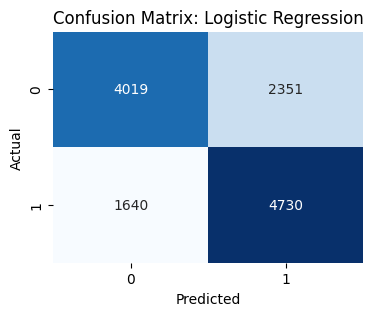

In [53]:
lr = LogisticRegression(random_state=42)

param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'max_iter': [100]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'max_iter': [100]}
]

lr_clf = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=False,
    n_jobs=-1
)

best_lr_clf = lr_clf.fit(X_train_res, y_train_res)
clf_performance(best_lr_clf, 'Logistic Regression', 'LR', X_train_res, y_train_res)


Support Vector Classifier
------------------------------
Akurasi: 0.8048665620094192
Presisi: 0.8075704783021856
Recall: 0.8004709576138147
ROC AUC: 0.8854466580739286
Confusion Matrix:
 [[5155 1215]
 [1271 5099]]


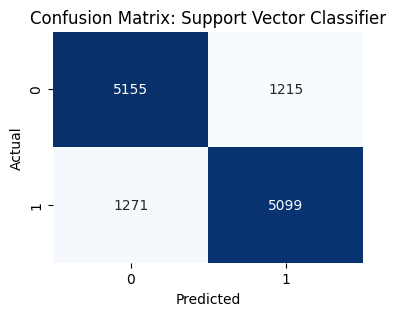

In [55]:
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=42)

param_grid = tuned_parameters = [{'kernel': ['rbf'],
                                  'gamma': ['scale', 'auto'],
                                  'C': [.1, 1, 2]},
                                 {'kernel': ['linear'],
                                  'C': [.1, 1, 10]}
                                ]

svc_clf = GridSearchCV(estimator=svc,
                       param_grid=param_grid,
                       scoring='recall',
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_svc_clf = svc_clf.fit(X_train_res, y_train_res)
clf_performance(best_svc_clf, 'Support Vector Classifier', 'SVC', X_train_res, y_train_res)


Random Forest
------------------------------
Akurasi: 0.8096546310832025
Presisi: 0.8182991770211393
Recall: 0.7960753532182103
ROC AUC: 0.8935240740421275
Confusion Matrix:
 [[5244 1126]
 [1299 5071]]


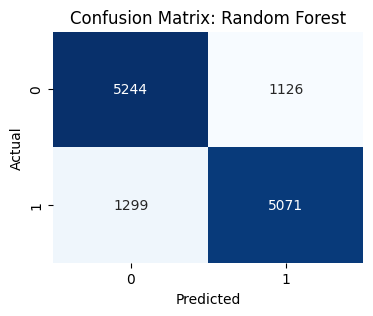

In [57]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

rf_clf = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      scoring='recall',
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_rf_clf = rf_clf.fit(X_train_res, y_train_res)
clf_performance(best_rf_clf, 'Random Forest', 'RF', X_train_res, y_train_res)


Gradient Boosting Classifier
------------------------------
Akurasi: 0.7970957613814756
Presisi: 0.8092825625102141
Recall: 0.7773940345368917
ROC AUC: 0.8818831034406275
Confusion Matrix:
 [[5203 1167]
 [1418 4952]]


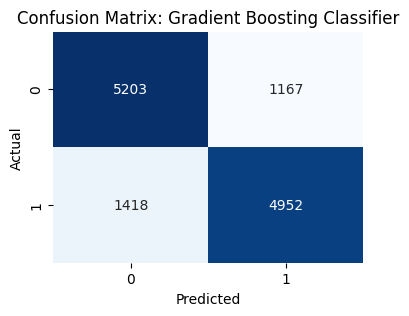

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

gbc = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [600],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3],  # default=3
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}

gbc_clf = GridSearchCV(estimator=gbc,
                       param_grid=param_grid,
                       scoring='recall',
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_gbc_clf = gbc_clf.fit(X_train_res, y_train_res)
clf_performance(best_gbc_clf, 'Gradient Boosting Classifier', 'GBC', X_train_res, y_train_res)

In [60]:
best_gbc_clf.best_estimator_.n_estimators_

287


XGBoost Classifier
------------------------------
Akurasi: 0.7979591836734694
Presisi: 0.8095238095238095
Recall: 0.7792778649921507
ROC AUC: 0.8783023838686543
Confusion Matrix:
 [[5202 1168]
 [1406 4964]]


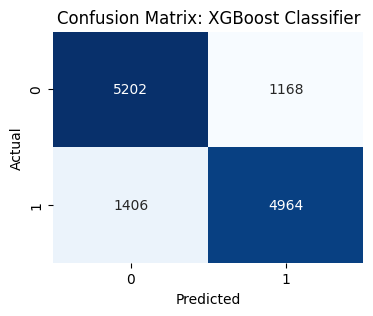

In [61]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],  # default=6
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1]
}

xgb_clf = GridSearchCV(estimator=xgb,
                       param_grid=param_grid,
                       scoring='recall',
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_xgb_clf = xgb_clf.fit(X_train_res, y_train_res)
clf_performance(best_xgb_clf, 'XGBoost Classifier', 'XGB', X_train_res, y_train_res)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5

LGBMClassifier
------------------------------
Akurasi: 0.81562009419

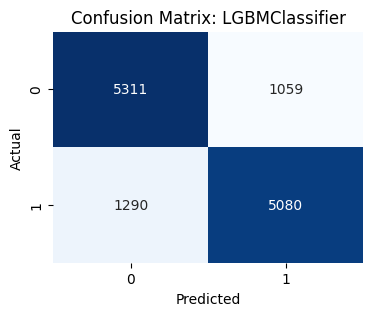

In [62]:
lgbmc = LGBMClassifier(random_state=42)

param_grid = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

lgbmc_clf = GridSearchCV(estimator=lgbmc,
                         param_grid=param_grid,
                         scoring='recall',
                         cv=5,
                         verbose=False,
                         n_jobs=-1)

best_lgbmc_clf = lgbmc_clf.fit(X_train_res, y_train_res)
clf_performance(best_lgbmc_clf, 'LGBMClassifier', 'LGBMC', X_train_res, y_train_res)